In [0]:
import pandas as pd
import numpy as np
import random
import string
from datetime import datetime, timedelta
from pyspark.sql import SparkSession

# Function to generate a random job name like 'job_ABC' with distinct letters
def generate_random_job_name():
    return 'job_' + ''.join(random.sample(string.ascii_uppercase, 3))  # Random 3 distinct letters

# Initialize a Spark session
spark = SparkSession.builder.master("local").appName("DataFrameExample").getOrCreate()

# Create a pandas DataFrame with 100 rows
num_rows = 100
job_ids = [f"job_{i}" for i in range(1, num_rows + 1)]
job_names = [generate_random_job_name() for _ in range(num_rows)]  # Random job names with distinct letters
issue_dates = [datetime(2020, 1, 1) + timedelta(days=np.random.randint(0, 365)) for _ in range(num_rows)]
last_runs = [datetime.now() - timedelta(days=np.random.randint(0, 30)) for _ in range(num_rows)]
run_frequencies = np.random.randint(1, 31, num_rows)  # Random integers from 1 to 30
unique_user_ids = [f"user_{i}" for i in range(1, 21)]  # Create 20 unique user IDs
users = np.random.choice(unique_user_ids, num_rows)  # Randomly select user IDs with repetition

# Create a pandas DataFrame
df1 = pd.DataFrame({
    'job_id': job_ids,
    'job_name': job_names,  # Random job names with 3 distinct uppercase letters
    'issue_date': issue_dates,
    'last_run': last_runs,
    'run_frequency': run_frequencies,
    'user_id': users  # Changed to 'user_id'
})

# Convert pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(df1)

# Show the PySpark DataFrame
spark_df.show(5)


+------+--------+-------------------+--------------------+-------------+-------+
|job_id|job_name|         issue_date|            last_run|run_frequency|user_id|
+------+--------+-------------------+--------------------+-------------+-------+
| job_1| job_TUM|2020-02-25 00:00:00|2025-01-13 13:27:...|           10|user_20|
| job_2| job_SWI|2020-03-04 00:00:00|2025-01-26 13:27:...|           25|user_18|
| job_3| job_XIY|2020-03-09 00:00:00|2025-01-05 13:27:...|           27|user_10|
| job_4| job_HLI|2020-11-20 00:00:00|2025-01-12 13:27:...|           19| user_4|
| job_5| job_IWB|2020-04-26 00:00:00|2025-01-13 13:27:...|           23| user_1|
+------+--------+-------------------+--------------------+-------------+-------+
only showing top 5 rows



In [0]:
# Function to generate a random storage usage between 1 KB and 2000 MB
def generate_storage_usage():
    return round(random.uniform(1, 2000), 2)  # Random float between 1 and 2000

# Function to generate a random job stage
def generate_job_stage():
    return random.choice(['running', 'completed', 'failed'])

# Function to generate job status based on job stage
def generate_job_status(stage):
    if stage == 'running':
        return 'no info'
    elif stage == 'completed':
        return random.choice(['normally', 'abnormally'])
    elif stage == 'failed':
        return random.choice(['cluster issue', 'storage issue', 'timeout', 'other'])

# Initialize a Spark session
spark = SparkSession.builder.master("local").appName("DataFrameExample").getOrCreate()

# Create a pandas DataFrame with 100 rows for df2
num_rows = 100
job_ids = [f"job_{i}" for i in range(1, num_rows + 1)]
job_stages = [generate_job_stage() for _ in range(num_rows)]  # Random job stages
job_statuses = [generate_job_status(stage) for stage in job_stages]  # Job statuses based on stages
storage_usage = [generate_storage_usage() for _ in range(num_rows)]  # Random storage usage

# Create a pandas DataFrame
df2 = pd.DataFrame({
    'job_id': job_ids,
    'job_stage': job_stages,  # Random job stages (running, completed, failed)
    'job_status': job_statuses,  # Job status based on job stage
    'storage_usage_mb': storage_usage  # Storage usage in MB (random between 1 KB to 2000 MB)
})

# Convert pandas DataFrame to PySpark DataFrame
spark_df2 = spark.createDataFrame(df2)

# Show the PySpark DataFrame
spark_df2.show(5)


+------+---------+----------+----------------+
|job_id|job_stage|job_status|storage_usage_mb|
+------+---------+----------+----------------+
| job_1|   failed|   timeout|         1146.34|
| job_2|   failed|   timeout|          431.43|
| job_3|   failed|   timeout|          108.06|
| job_4|  running|   no info|           70.19|
| job_5|completed|abnormally|          683.89|
+------+---------+----------+----------------+
only showing top 5 rows



Out[27]: Text(0, 0.5, 'storage')

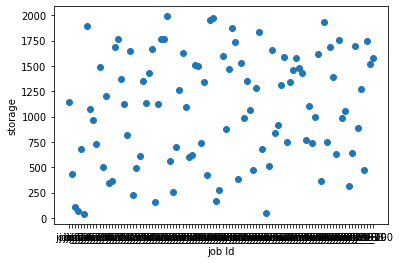

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.scatter(df2.job_id, df2.storage_usage_mb)
plt.xlabel("job Id")
plt.ylabel("storage")


In [0]:
spark_df2.createOrReplaceTempView("secondary")
sql_query = "select job_status,avg(storage_usage_mb) as avg,sum(storage_usage_mb) as sum,count(job_id) as count from secondary group by job_status"
result_df = spark.sql(sql_query)
result_df.show()

+-------------+------------------+------------------+-----+
|   job_status|               avg|               sum|count|
+-------------+------------------+------------------+-----+
|      timeout| 738.9090000000001| 7389.090000000001|   10|
|storage issue|         918.22625|           7345.81|    8|
|   abnormally|1093.9476190476187|22972.899999999994|   21|
|      no info|1135.5116666666668|40878.420000000006|   36|
|     normally| 1143.028888888889|          20574.52|   18|
|        other|1248.7666666666667|            7492.6|    6|
|cluster issue|           1053.16|           1053.16|    1|
+-------------+------------------+------------------+-----+



In [0]:
spark_df.createOrReplaceTempView("primary")
spark_df2.createOrReplaceTempView("secondary")
sql_querry1 = "select p.job_id, s.job_stage, s.job_status, TIMESTAMPDIFF(MONTH, p.issue_date, p.last_run) AS JobLife_Month, p.run_frequency, s.storage_usage_mb from primary as p join secondary as s on p.job_id = s.job_id where s.job_stage = 'failed' order by p.run_frequency asc"
FinalResult_df = spark.sql(sql_querry1)
FinalResult_df.show()

+------+---------+-------------+-------------+-------------+----------------+
|job_id|job_stage|   job_status|JobLife_Month|run_frequency|storage_usage_mb|
+------+---------+-------------+-------------+-------------+----------------+
|job_19|   failed|        other|           50|            6|         1125.16|
|job_38|   failed|storage issue|           50|            6|         1632.19|
|job_33|   failed|      timeout|           54|            7|         1989.15|
| job_1|   failed|      timeout|           58|           10|         1146.34|
|job_48|   failed|        other|           49|           10|         1976.76|
|job_22|   failed|storage issue|           57|           10|          223.14|
|job_81|   failed|      timeout|           53|           12|          992.35|
|job_57|   failed|        other|           52|           12|         1528.99|
|job_24|   failed|storage issue|           54|           12|          607.14|
|job_97|   failed|      timeout|           52|           16|    

Out[31]: Text(0, 0.5, 'storage')

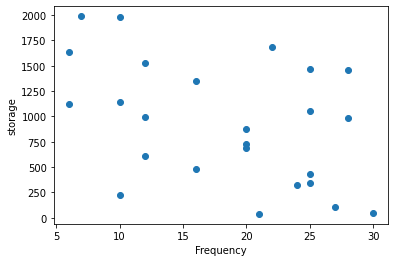

In [0]:
FRP_df = FinalResult_df.toPandas()
X = FRP_df[['run_frequency']]
Y = FRP_df[['storage_usage_mb']]
plt.scatter(X,Y)
plt.xlabel("Frequency")
plt.ylabel("storage")

In [0]:
# Identifying low activity by assigning a threshold.
from sklearn import linear_model
reg = linear_model.LinearRegression()
FinalResultp_df = FinalResult_df.toPandas()
FRP_df = pd.DataFrame(FinalResultp_df )
X = FRP_df[['run_frequency']]
Y = FRP_df[['storage_usage_mb']]
reg.fit(X,Y)

In [0]:
reg.predict([[2]])

In [0]:
figure, axis = plt.subplots(2,2)

A = FRP_df['run_frequency']
B = FRP_df['JobLife_Month']
C = FRP_df['job_status']
D = FRP_df['storage_usage_mb']

axis[0,0].scatter(B,A, color="red")
axis[0,1].scatter(C,A, color="green")
axis[1,0].scatter(B,D, color="blue")
axis[1,1].scatter(C,D, color="purple")

axis[0, 0].set_xlabel('JobLife_Month')
axis[0, 0].set_ylabel('Run Frequency')
axis[0, 1].set_xlabel('Job Status')
axis[0, 1].set_ylabel('Run Frequency')
axis[1, 0].set_xlabel('JobLife_Month')
axis[1, 0].set_ylabel('Storage Usage (MB)')
axis[1, 1].set_xlabel('Job Status')
axis[1, 1].set_ylabel('Storage Usage (MB)')

plt.tight_layout()
plt.show()

In [0]:
std_dev = FRP_df['run_frequency'].std()

q75 = FRP_df['run_frequency'].quantile(0.75)
q25 = FRP_df['run_frequency'].quantile(0.25)
iqr = q75 - q25
quartile_deviation = iqr / 2

print(f"Standard Deviation: {std_dev}")
print(f"Quartile Deviation: {quartile_deviation}")
print(f"25% First Quarter: {q25}")
print(f"75% Last Quarter: {q75}")

In [0]:
std_dev1 = FRP_df['storage_usage_mb'].std()

q75 = FRP_df['storage_usage_mb'].quantile(0.75)
q25 = FRP_df['storage_usage_mb'].quantile(0.25)
iqr = q75 - q25
quartile_deviation1 = iqr / 2

print(f"Standard Deviation: {std_dev1}")
print(f"Quartile Deviation: {quartile_deviation1}")
print(f"25% First Quarter: {q25}")
print(f"75% Last Quarter: {q75}")

In [0]:
A = FRP_df['run_frequency']
D = FRP_df['storage_usage_mb']
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

axis[0].boxplot([A], labels=['Run Frequency'])
axis[1].boxplot([D], labels=['Storage Usage (MB)'])

axis[0].set_title('Boxplot of Run Frequency')
axis[1].set_title('Boxplot of Storage Usage (MB)')

plt.tight_layout()
plt.show()


In [0]:
sql_query2 = """
SELECT p.job_id, 
       s.job_stage, 
       s.job_status, 
       p.run_frequency, 
       s.storage_usage_mb,
       CASE 
           WHEN p.run_frequency < 9 THEN 'Yes'
           ELSE 'No' 
       END AS Low_activity,
       CASE 
           WHEN s.storage_usage_mb > 435 THEN 'Yes'
           ELSE 'No' 
       END AS High_Storage,
       CASE 
           WHEN 
               (CASE WHEN p.run_frequency < 9 THEN 1 ELSE 0 END) = 1
               AND 
               (CASE WHEN s.storage_usage_mb > 435 THEN 1 ELSE 0 END) = 1
           THEN 'Yes'
           ELSE 'No' 
       END AS LA_HS
FROM primary AS p 
JOIN secondary AS s 
ON p.job_id = s.job_id
"""

FinalResult1_df = spark.sql(sql_query2)
FinalResult1_df.show()

+------+---------+-------------+-------------+----------------+------------+------------+-----+
|job_id|job_stage|   job_status|run_frequency|storage_usage_mb|Low_activity|High_Storage|LA_HS|
+------+---------+-------------+-------------+----------------+------------+------------+-----+
| job_1|   failed|storage issue|            1|          130.73|         Yes|          No|   No|
| job_2|   failed|storage issue|           27|          367.21|          No|          No|   No|
| job_3|   failed|      timeout|           16|          386.65|          No|          No|   No|
| job_4|  running|      no info|            5|          190.13|         Yes|          No|   No|
| job_5|completed|     normally|           20|          803.88|          No|         Yes|   No|
| job_6|completed|     normally|            2|         1327.25|         Yes|         Yes|  Yes|
| job_7|  running|      no info|            2|         1903.12|         Yes|         Yes|  Yes|
| job_8|   failed|storage issue|        

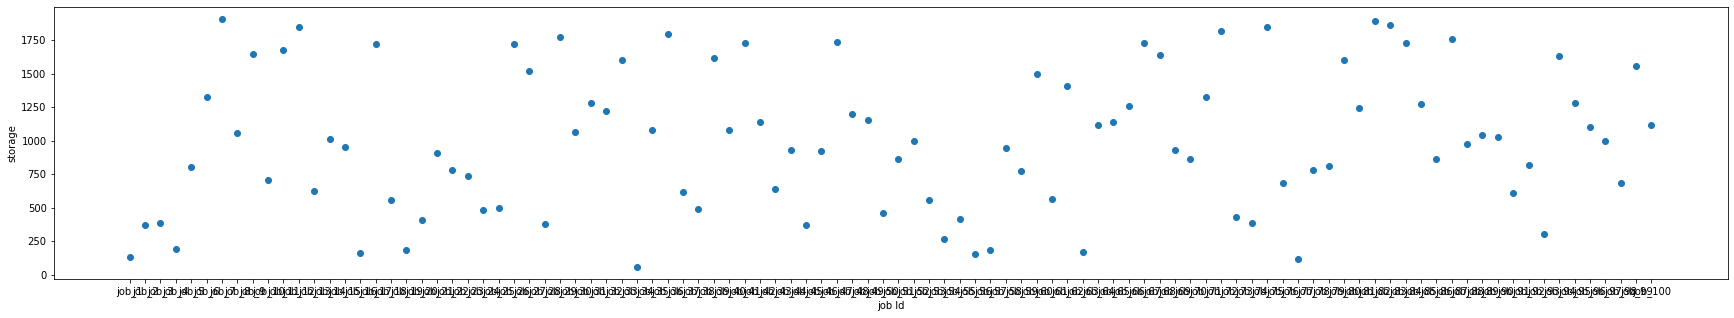

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

plt.figure(figsize=(30, 5))
plt.scatter(df2.job_id, df2.storage_usage_mb)
plt.xlabel("job Id")
plt.ylabel("storage")

plt.show()

Out[32]: Text(0, 0.5, 'storage')

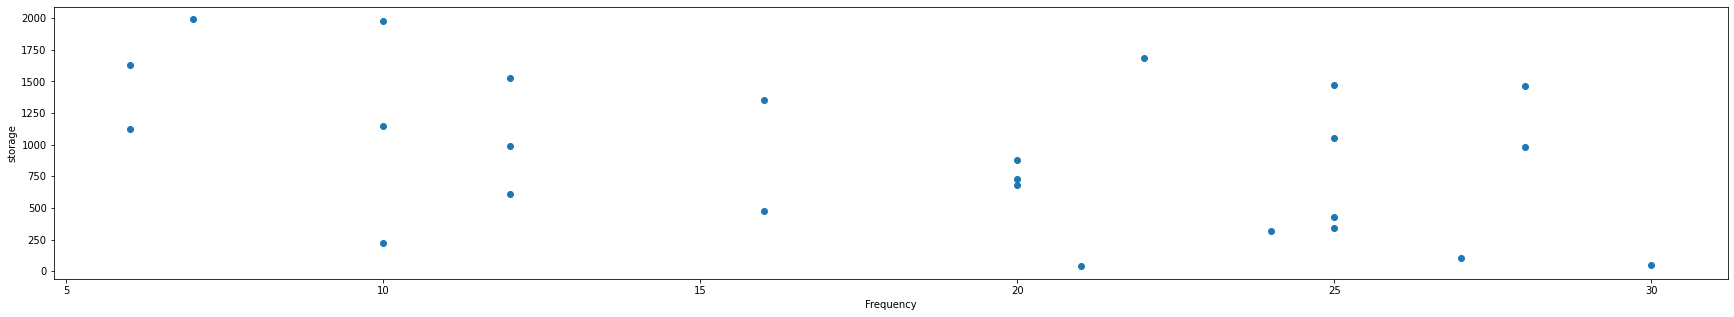

In [0]:
X = FRP_df[['run_frequency']]
Y = FRP_df[['storage_usage_mb']]
plt.figure(figsize=(30, 5))
plt.scatter(X,Y)
plt.xlabel("Frequency")
plt.ylabel("storage")
